## 预感这段时间要记录很多试验结果。

#### 重新确认一遍我们自己的方法结果
- GAIP on Mixamo-IMU **offline**:
    - SIP Error (deg): 24.81 (+/- 7.15)
    - Angular Error (deg): 10.96 (+/- 3.66)
    - Positional Error (cm): 8.76 (+/- 2.79)
    - Mesh Error (cm): 0.00 (+/- 0.00)
    - Jitter Error (100m/s^3): 3.36 (+/- 5.43)
    - Jitter Error GT(100m/s^3): 3.85 (+/- 4.15)
    - Jitter Error2 (100m/s^3)【就是只考虑reduced joints算出来的jit】: 2.07 (+/- 3.45)
    - Jitter Error2 GT(100m/s^3): 2.36 (+/- 2.61)

### 关于k取值的实验
- 目的：证明 k<4 或者 k>4 都会导致训练提前崩溃or结果不好
- 设置：为了**训练速度**，我把FK pos loss和consistence loss都取消了，只有Gloss和rec loss
- 结果：
    - k=2：
        - events.out.tfevents.1709475105.duludulupa-MS-7B94.7555【G(回归)网络参数的比例是40,0.5,30,50】（参考`architecture.py`的174行）
        - 应该是为了统一采用了 events.out.tfevents.1709648284.duludulupa-MS-7B94.14879，是「301epoch」
    - k=4:
        - events.out.tfevents.1709454606.duludulupa-MS-7B94.2351 【G(回归)网络参数的比例是50,1,50,50】【发现在验证集上，**jitter error明显更大**，其他的指标没有优势，应该是**rec_loss比例小了的问题**】{应该不会采用}
        - 【**调大了rec_loss比例进行的实验问题**】最终版应该是 events.out.tfevents.1709634147.duludulupa-MS-7B94.22575 「251epoch」
    - k=6:应该是events.out.tfevents.1709648483.duludulupa-MS-7B94.15360，后来的这个，有「301epoch」
    - k=8: events.out.tfevents.1709633768.duludulupa-MS-7B94.21594「251epoch」

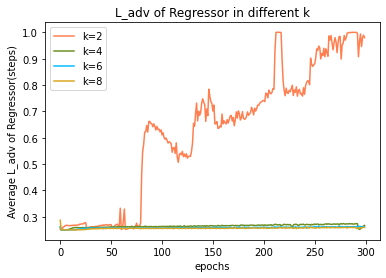

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
# from tensorboard import tensorboard_smoothing

# 第一幅图片：训练的平均长度
fig, ax1 = plt.subplots(1, 1)    # a figure with a 2x1 grid of Axes
k2 = pd.read_csv("train/logs/k_eq_2_gloss.csv")
k4 = pd.read_csv("train/logs/k_eq_4_gloss.csv")
k6 = pd.read_csv("train/logs/k_eq_6_gloss.csv")
k8 = pd.read_csv("train/logs/k_eq_8_gloss.csv")

ax1.plot(k2['Step'], k2['Value'], label='k=2', color="coral")
ax1.plot(k4['Step'], k4['Value'], label='k=4', color="olivedrab")
ax1.plot(k6['Step'], k6['Value'], label='k=6', color="deepskyblue")
ax1.plot(k8['Step'], k8['Value'], label='k=8', color="goldenrod")
#ax1.set_xticks(np.arange(0, 24, step=2))
ax1.set_xlabel("epochs")
ax1.set_ylabel("Average L_adv of Regressor(steps)")
ax1.set_title("L_adv of Regressor in different k")
ax1.legend()
plt.show()
fig.savefig(fname='train/logs/Gloss'+'.pdf', format='pdf')